<a href="https://colab.research.google.com/github/etendra2501/LA-Crime_Data_2020_to_Present/blob/main/LA_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
app_df = pd.read_csv('/content/gdrive/MyDrive/LA  Crime Data/Crime_Data_from_2020_to_Present..csv')

In [ ]:
!touch "/content/gdrive/MyDrive/LA  Crime Data/Crime_Data_from_2020_to_Present..csv"
df = pd.read_csv("/content/gdrive/MyDrive/LA  Crime Data/Crime_Data_from_2020_to_Present..csv")
df.head()

DR_NO               Date_Rptd                DATE_OCC  TIME_OCC  AREA  \
0   10304468        01-08-2020 00:00        01-08-2020 00:00      2230     3   
1  190101086        01-02-2020 00:00        01-01-2020 00:00       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505        01-01-2020 00:00        01-01-2020 00:00      1730    15   
4  191921269        01-01-2020 00:00        01-01-2020 00:00       415    19   

     AREA_NAME  Rp_ Dist_No  Part_1-2  Crm_Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm_Cd_Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status_Desc Crm_Cd_1 Crm_Cd_2  Crm_Cd_3 Crm_Cd_4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross_Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [ ]:

df.tail()

DR_NO               Date_Rptd                DATE_OCC  TIME_OCC  \
577564  220506760  03/14/2022 12:00:00 AM  03/13/2022 12:00:00 AM      1330   
577565  221117203        12-07-2022 00:00  11/22/2022 12:00:00 AM      1700   
577566  220109037  03/26/2022 12:00:00 AM  03/25/2022 12:00:00 AM      1740   
577567  220220394  11/18/2022 12:00:00 AM  11/18/2022 12:00:00 AM      1705   
577568  221709475  05/30/2022 12:00:00 AM  05/29/2022 12:00:00 AM      1400   

        AREA   AREA_NAME  Rp_ Dist_No  Part_1-2  Crm_Cd  \
577564     5      Harbor          503         1     510   
577565    11   Northeast         1184         1     510   
577566     1     Central          138         1     330   
577567     2     Rampart          249         1     510   
577568    17  Devonshire         1735         1     420   

                                            Crm_Cd_Desc  ... Status  \
577564                                 VEHICLE - STOLEN  ...     IC   
577565                                 VEHICLE - STOLEN  ...     IC   
577566                            BURGLARY FROM VEHICLE  ...     IC   
577567                                 VEHICLE - STOLEN  ...     IC   
577568  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  ...     IC   

        Status_Desc Crm_Cd_1 Crm_Cd_2  Crm_Cd_3 Crm_Cd_4  \
577564  Invest Cont    510.0      NaN       NaN      NaN   
577565  Invest Cont    510.0      NaN       NaN      NaN   
577566  Invest Cont    330.0      NaN       NaN      NaN   
577567  Invest Cont    510.0      NaN       NaN      NaN   
577568  Invest Cont    420.0      NaN       NaN      NaN   

                                        LOCATION Cross_Street      LAT  \
577564  25500    PINE CREEK                   LN          NaN  33.7911   
577565   1500    SARGENT                      PL          NaN  34.0790   
577566                                       3RD    SAN PEDRO  34.0473   
577567   1100 W  6TH                          ST          NaN  34.0541   
577568  17100    TULSA                        ST          NaN  34.2685   

             LON  
577564 -118.2844  
577565 -118.2533  
577566 -118.2425  
577567 -118.2621  
577568 -118.5000  

[5 rows x 28 columns]

In [ ]:
df.describe()

DR_NO       TIME_OCC           AREA    Rp_ Dist_No  \
count  5.775690e+05  577569.000000  577569.000000  577569.000000   
mean   2.108904e+08    1337.383968      10.740327    1120.357777   
std    8.114219e+06     653.853378       6.080941     608.098669   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.016092e+08     900.000000       6.000000     625.000000   
50%    2.110131e+08    1415.000000      11.000000    1143.000000   
75%    2.204072e+08    1900.000000      16.000000    1621.000000   
max    2.321056e+08    2359.000000      21.000000    2199.000000   

            Part_1-2         Crm_Cd       Vict_Age      Premis_Cd  \
count  577569.000000  577569.000000  577569.000000  577561.000000   
mean        1.415490     502.388321      30.022531     302.354408   
std         0.492807     208.506406      21.675937     215.833103   
min         1.000000     110.000000      -2.000000     101.000000   
25%         1.000000     330.000000      12.000000     101.000000   
50%         1.000000     442.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     971.000000   

       Weapon_Used_Cd       Crm_Cd_1      Crm_Cd_2     Crm_Cd_3    Crm_Cd_4  \
count   203086.000000  577562.000000  43941.000000  1497.000000   45.000000   
mean       361.983736     502.119656    955.368631   982.752839  989.466667   
std        123.705570     208.292382    114.700793    53.785041   31.306839   
min        101.000000     110.000000    210.000000   434.000000  821.000000   
25%        308.000000     330.000000    998.000000   998.000000  998.000000   
50%        400.000000     442.000000    998.000000   998.000000  998.000000   
75%        400.000000     626.000000    998.000000   998.000000  998.000000   
max        516.000000     956.000000    999.000000   999.000000  999.000000   

                 LAT            LON  
count  577569.000000  577569.000000  
mean       33.939802    -117.889890  
std         2.132969       7.399485  
min         0.000000    -118.667600  
25%        34.012400    -118.429700  
50%        34.058200    -118.321600  
75%        34.163200    -118.273900  
max        34.334300       0.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577569 entries, 0 to 577568
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           577569 non-null  int64  
 1   Date_Rptd       577569 non-null  object 
 2   DATE_OCC        577569 non-null  object 
 3   TIME_OCC        577569 non-null  int64  
 4   AREA            577569 non-null  int64  
 5   AREA_NAME       577569 non-null  object 
 6   Rp_ Dist_No     577569 non-null  int64  
 7   Part_1-2        577569 non-null  int64  
 8   Crm_Cd          577569 non-null  int64  
 9   Crm_Cd_Desc     577569 non-null  object 
 10  Mocodes         497977 non-null  object 
 11  Vict_Age        577569 non-null  int64  
 12  Vict_Sex        501801 non-null  object 
 13  Vict_Descent    501797 non-null  object 
 14  Premis_Cd       577561 non-null  float64
 15  Premis_Desc     577298 non-null  object 
 16  Weapon_Used_Cd  203086 non-null  float64
 17  Weapon_Des

In [ ]:
df.shape

(577569, 28)

In [ ]:
df.isnull()
# if the value is null it returns True, and False values are other than null.

DR_NO  Date_Rptd  DATE_OCC  TIME_OCC   AREA  AREA_NAME  Rp_ Dist_No  \
0       False      False     False     False  False      False        False   
1       False      False     False     False  False      False        False   
2       False      False     False     False  False      False        False   
3       False      False     False     False  False      False        False   
4       False      False     False     False  False      False        False   
...       ...        ...       ...       ...    ...        ...          ...   
577564  False      False     False     False  False      False        False   
577565  False      False     False     False  False      False        False   
577566  False      False     False     False  False      False        False   
577567  False      False     False     False  False      False        False   
577568  False      False     False     False  False      False        False   

        Part_1-2  Crm_Cd  Crm_Cd_Desc  ...  Status  Status_Desc  Crm_Cd_1  \
0          False   False        False  ...   False        False     False   
1          False   False        False  ...   False        False     False   
2          False   False        False  ...   False        False     False   
3          False   False        False  ...   False        False     False   
4          False   False        False  ...   False        False     False   
...          ...     ...          ...  ...     ...          ...       ...   
577564     False   False        False  ...   False        False     False   
577565     False   False        False  ...   False        False     False   
577566     False   False        False  ...   False        False     False   
577567     False   False        False  ...   False        False     False   
577568     False   False        False  ...   False        False     False   

        Crm_Cd_2  Crm_Cd_3  Crm_Cd_4  LOCATION  Cross_Street    LAT    LON  
0           True      True      True     False          True  False  False  
1           True      True      True     False          True  False  False  
2           True      True      True     False          True  False  False  
3          False      True      True     False          True  False  False  
4           True      True      True     False          True  False  False  
...          ...       ...       ...       ...           ...    ...    ...  
577564      True      True      True     False          True  False  False  
577565      True      True      True     False          True  False  False  
577566      True      True      True     False         False  False  False  
577567      True      True      True     False          True  False  False  
577568      True      True      True     False          True  False  False  

[577569 rows x 28 columns]

In [ ]:
#check missing values
missing = df.isnull().sum()
missing.sort_values(ascending=False)
#There are Null values as data in not cleaned 

Crm_Cd_4          577524
Crm_Cd_3          576072
Crm_Cd_2          533628
Cross_Street      481263
Weapon_Used_Cd    374483
Weapon_Desc       374483
Mocodes            79592
Vict_Descent       75772
Vict_Sex           75768
Premis_Desc          271
Premis_Cd              8
Crm_Cd_1               7
LAT                    0
LOCATION               0
Status_Desc            0
Status                 0
DR_NO                  0
Date_Rptd              0
Vict_Age               0
Crm_Cd_Desc            0
Crm_Cd                 0
Part_1-2               0
Rp_ Dist_No            0
AREA_NAME              0
AREA                   0
TIME_OCC               0
DATE_OCC               0
LON                    0
dtype: int64

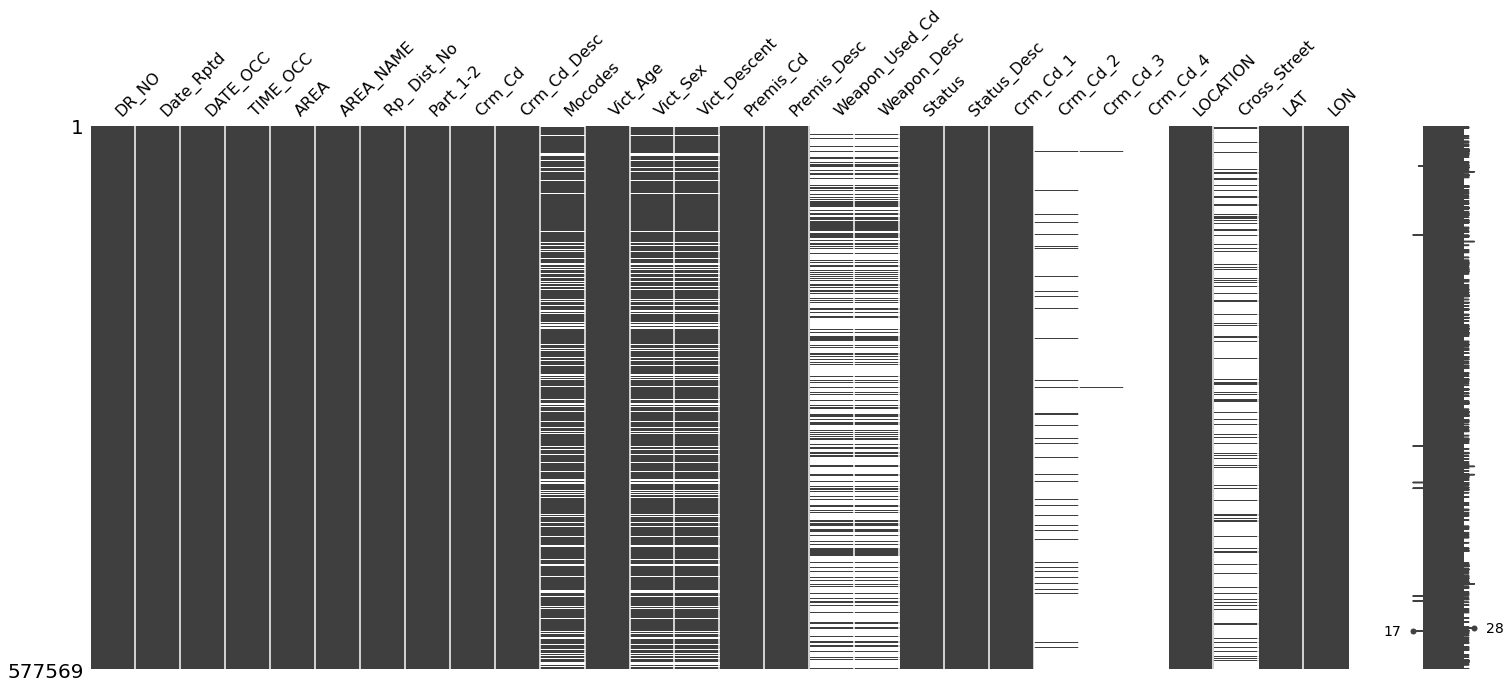

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# Any missing values?
df.isnull().values.any()

True

In [ ]:
## Total number of missing values
df.isnull().sum().sum()

3148871

In [ ]:
# Replace using median 
median = df['Crm_Cd_4'].median()
df['Crm_Cd_4'].fillna(median, inplace=True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
missing = df.isnull().sum()
missing.sort_values(ascending=False)
#There are no Null values as data cleaned 

DR_NO             0
Date_Rptd         0
LAT               0
Cross_Street      0
LOCATION          0
Crm_Cd_4          0
Crm_Cd_3          0
Crm_Cd_2          0
Crm_Cd_1          0
Status_Desc       0
Status            0
Weapon_Desc       0
Weapon_Used_Cd    0
Premis_Desc       0
Premis_Cd         0
Vict_Descent      0
Vict_Sex          0
Vict_Age          0
Mocodes           0
Crm_Cd_Desc       0
Crm_Cd            0
Part_1-2          0
Rp_ Dist_No       0
AREA_NAME         0
AREA              0
TIME_OCC          0
DATE_OCC          0
LON               0
dtype: int64

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  15


In [ ]:
#LIST OF NUMERICAL FEATURES
df[numerical_features].head()

DR_NO  TIME_OCC  AREA  Rp_ Dist_No  Part_1-2  Crm_Cd  Vict_Age  \
0   10304468      2230     3          377         2     624        36   
1  190101086       330     1          163         2     624        25   
2  200110444      1200     1          155         2     845         0   
3  191501505      1730    15         1543         2     745        76   
4  191921269       415    19         1998         2     740        31   

   Premis_Cd  Weapon_Used_Cd  Crm_Cd_1  Crm_Cd_2  Crm_Cd_3  Crm_Cd_4      LAT  \
0      501.0           400.0     624.0       0.0       0.0     998.0  34.0141   
1      102.0           500.0     624.0       0.0       0.0     998.0  34.0459   
2      726.0             0.0     845.0       0.0       0.0     998.0  34.0448   
3      502.0             0.0     745.0     998.0       0.0     998.0  34.1685   
4      409.0             0.0     740.0       0.0       0.0     998.0  34.2198   

        LON  
0 -118.2978  
1 -118.2545  
2 -118.2474  
3 -118.4019  
4 -118.4468

In [ ]:
# Types of numerical variables - discrete & continuous variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 3


['AREA', 'Part_1-2', 'Crm_Cd_4']

In [ ]:
#continuous features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['id']]
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

Continuous feature Count 12


['DR_NO',
 'TIME_OCC',
 'Rp_ Dist_No',
 'Crm_Cd',
 'Vict_Age',
 'Premis_Cd',
 'Weapon_Used_Cd',
 'Crm_Cd_1',
 'Crm_Cd_2',
 'Crm_Cd_3',
 'LAT',
 'LON']

**Visualization**

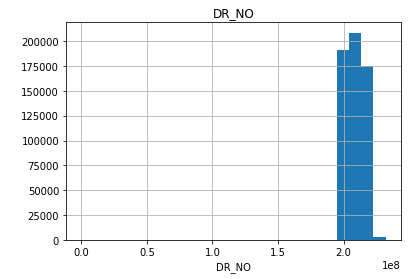

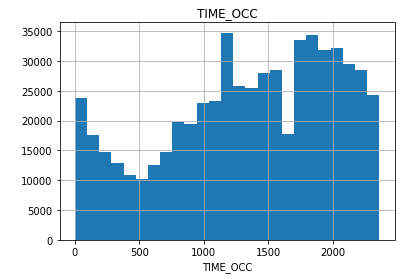

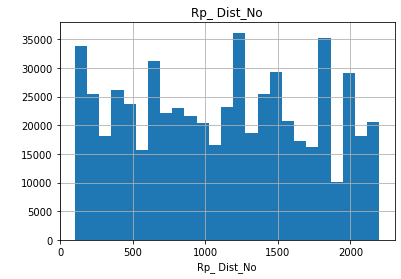

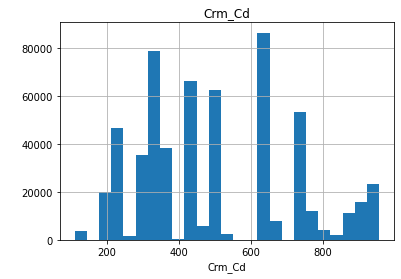

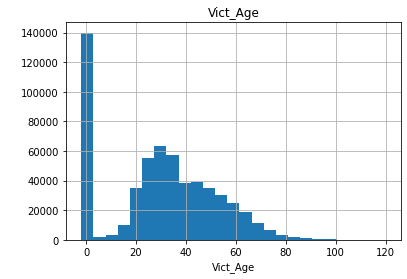

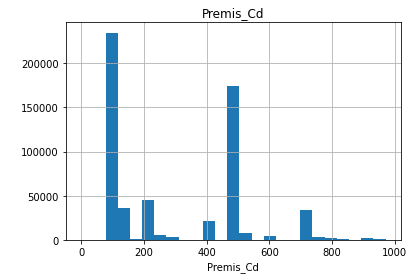

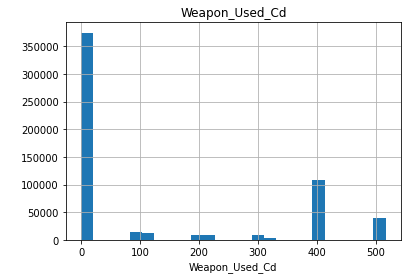

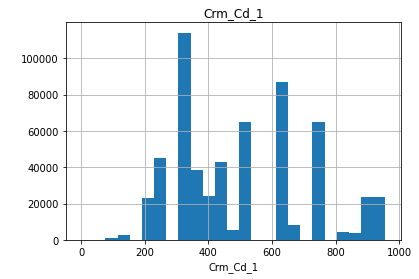

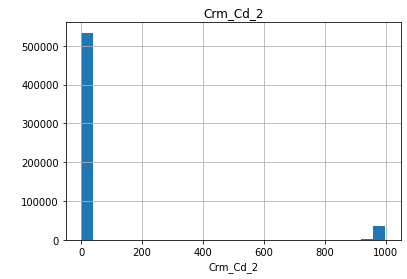

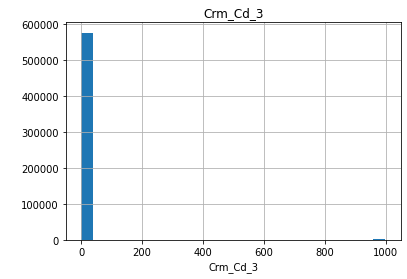

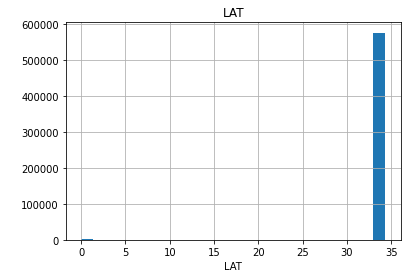

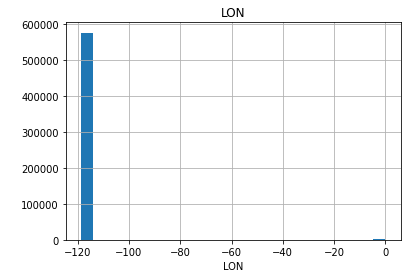

In [ ]:
## Analyzing the continuous values by creating histograms to understand the distribution
from matplotlib import pyplot as plt
for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count", color= "white")
    plt.title(feature)
    plt.show()

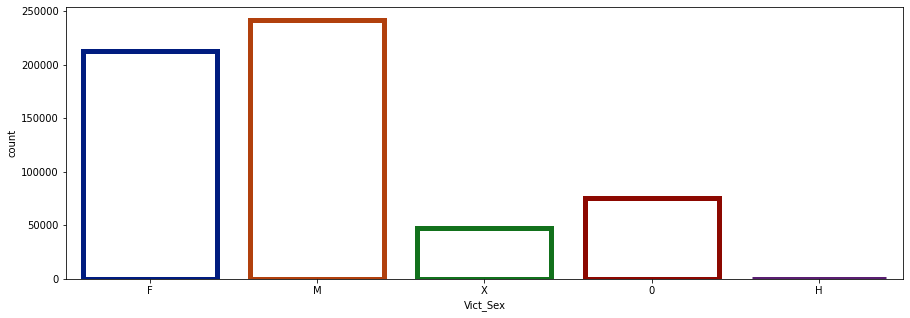

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Vict_Sex", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
import plotly.graph_objects as go
labels = df.Status.unique()
values=[]
for each in labels:
    values.append(len(df[df.Status==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

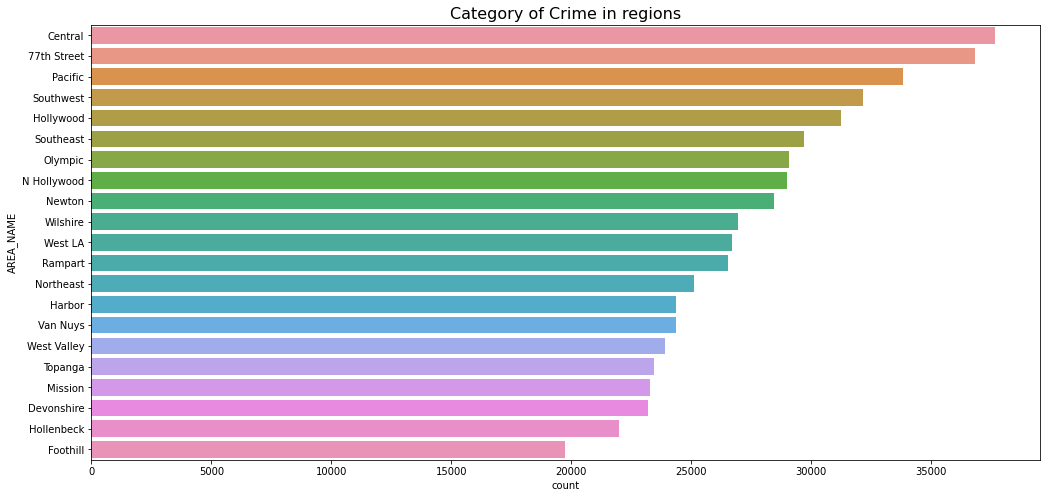

In [ ]:
#Category of Crime in each region
fig, ax = plt.subplots(figsize=(17,8))
ind_count = df['AREA_NAME'].value_counts().sort_values(ascending=False)
sns.countplot(y='AREA_NAME',data=df,ax=ax,order=ind_count.index)
plt.title('Category of Crime in regions',fontsize=16)
plt.show()

In [ ]:
#Categories of crime in state
fig, ax = plt.subplots(figsize=(150,250))
ind_count = df['Crm_Cd_Desc'].value_counts().sort_values(ascending=False)
sns.countplot(y='Crm_Cd_Desc',data=df,ax=ax,order=ind_count.index)
plt.title('Category of Crime',fontsize=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



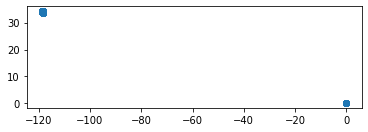

In [ ]:
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['LON'], app_df['LAT'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)
geo_df.plot()

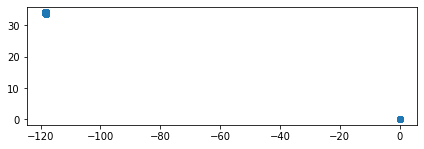

In [ ]:
fig, ax = plt.subplots(figsize=(7,8))
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

In [138]:
#Number of Crime in State
import plotly.express as px

fig = px.bar(df,y='Vict_Age',x='Vict_Sex',orientation='v',title = "Number of Crime in State", width=1000, height=500)
fig.show()

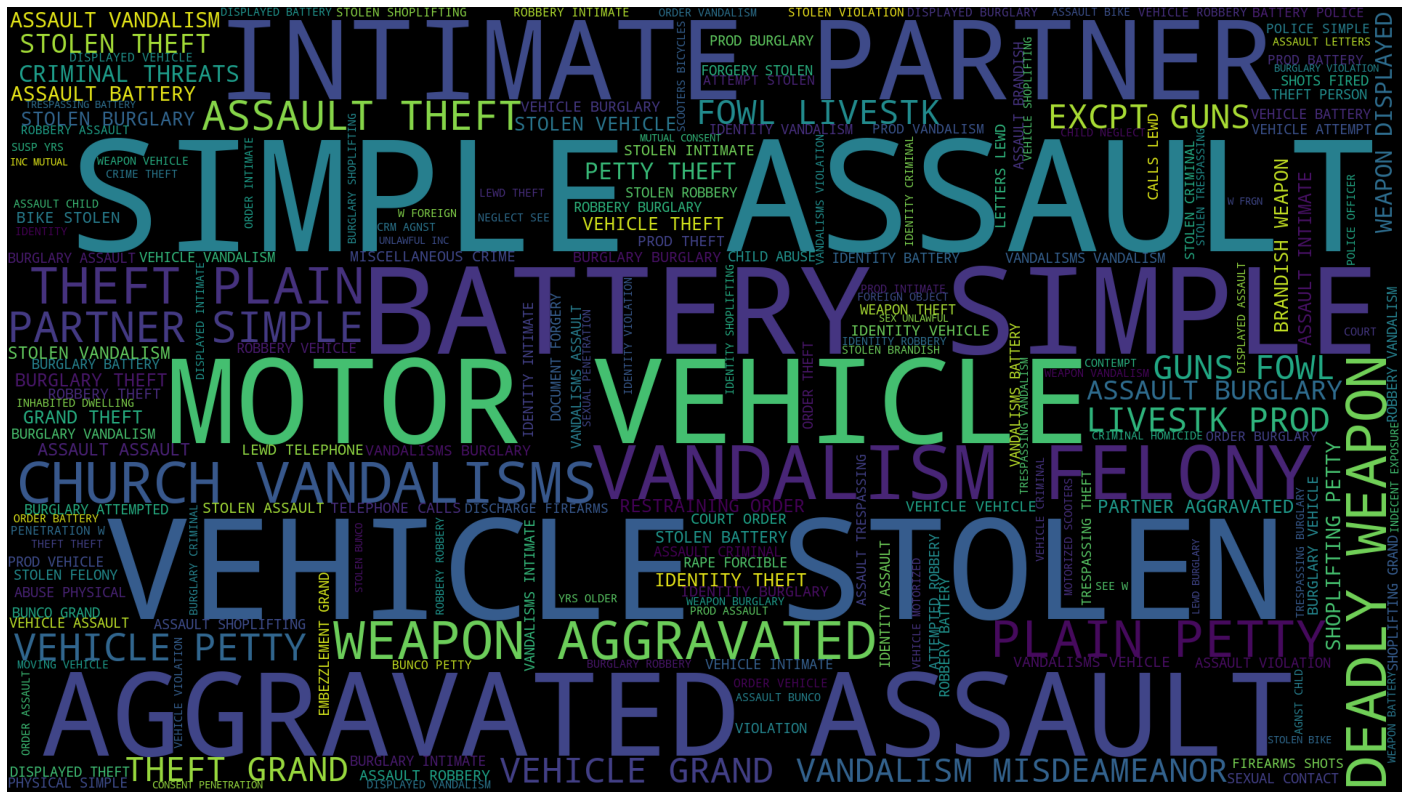

In [139]:
from wordcloud import WordCloud 
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Crm_Cd_Desc))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [ ]:
fig = px.scatter_mapbox(df[df["Crm_Cd_Desc"]=="Service"], lat="LAT", lon="LON", hover_name="Crm Cd", hover_data=["AREA_NAME", "Crm_Cd"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()